<a href="https://colab.research.google.com/github/B-Lorentz/physics-bsc-visual/blob/main/3_Exact_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from jax import numpy as jnp
from jax import grad, vmap, jit, random, lax, ops
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, widgets
from sympy import *
init_printing()

# Problems with exact solutions

### Damped harmonic oscillator

$$\ddot{x} + 2\beta\dot{x} + \omega_0^2 x=0$$

$$x(t) = A(t)\sin(\omega t + \phi)$$


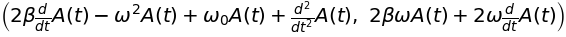

In [ ]:
x, t, beta, w, w_0 = symbols("x t beta omega omega_0",real=True)
A = Function("A")(t)
xa = A*sin(w*t)
eq = (diff(diff(xa, t), t) + 2*beta*diff(xa, t) + w_0*xa).expand()
eq.coeff(sin(w*t)), eq.coeff(cos(w*t))

$$[\ddot{A} + 2\beta \dot{A} + (\omega_0^2 - \omega^2)A]\sin(\omega t +\phi) = 0$$

$$[2\omega(\dot{A} + \beta A)]\cos(\omega t +\phi) = 0$$

$$A(t) = A_0 e^{-\beta t}$$

$$\omega = \sqrt{\omega_0^2 - \beta^2}$$

In [ ]:
def plot(b):
  xaf =  lambda t: jnp.exp(-b*t)*jnp.sin(jnp.sqrt(1-b**2)*t)
  ts = np.linspace(0, 20, 1000)
  plt.figure(figsize=(12, 6))
  plt.plot(ts, xaf(ts))
  plt.plot(ts, np.zeros_like(ts), "black")
  plt.grid()
  plt.xlabel("t", fontsize=14)
  plt.ylabel("$x/A_0$", fontsize=14)

interact(plot, b=widgets.FloatSlider(value=0.5, min=0.0, max=0.9))

interactive(children=(FloatSlider(value=0.5, description='b', max=0.9), Output()), _dom_classes=('widget-inter…

<function __main__.plot>

## Driven oscillator

$$\ddot{x} + 2\beta\dot{x} + \omega_0^2 x= a_0 \sin(\omega t)$$

$$x(t) = A\sin(\omega t + \phi)$$

$$A = \frac{a_0}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\beta^2 \omega^2}}$$

$$\tan(\phi) = \frac{2\beta\omega}{\omega^2 - \omega_0^2}$$

In [ ]:
 def plot1(w, b):
  print(w)
  w_0 = 1.0 
  dfun =lambda w: np.arctan(2*b*w/(w**2-w_0**2))
  Afun = lambda w: 1/jnp.sqrt((w**2-w_0**2)**2 + 4*b**2*w**2)
  xaf =  lambda t: jnp.sin(w*t + dfun(w))*Afun(w)

  ts = np.linspace(0, 40, 1000)
  plt.figure(figsize=(18, 6))
  plt.subplot(131)
  plt.plot(ts, np.sin(w*ts), label="a/a_0")
  plt.plot(ts, xaf(ts), label="x(t)/a_0")
  plt.plot(ts, np.zeros_like(ts), "black")
  plt.grid()
  plt.xlabel("t", fontsize=14)
  plt.legend(fontsize=14)
  plt.subplot(132)
  ws = np.linspace(0.1, 2.0, 200)
  plt.plot(ws, Afun(ws))
  plt.plot([w], Afun(w), "rx")
  plt.xlabel("$\omega$", fontsize=14)
  plt.ylabel("$A$", fontsize=14)
  plt.grid()
  plt.subplot(133)
  ws = np.linspace(0.0, 2.0, 200)
  plt.plot(ws, dfun(ws))
  plt.plot([w], dfun(w), "rx")
  plt.xlabel("$\omega$", fontsize=14)
  plt.ylabel("$\phi$", fontsize=14)
  plt.grid()

interact(plot1, b=widgets.FloatSlider(value=0.25, min=0.01, max=0.5, step=0.01), w=widgets.FloatSlider(value=0.1, min=0.0, max=2.0, step=0.04999))
None

interactive(children=(FloatSlider(value=0.1, description='w', max=2.0, step=0.04999), FloatSlider(value=0.25, …

# Linear chain

$$\ddot{u}_i = \omega_0^2(u_{i+1} + u_{i-1} - 2 u_i)$$

Written as matrix equation: 

$$\ddot{u} = \mathbf{D} u$$

$$u_i(t) = A(q)e^{jiqa}e^{j\omega t}$$

Eigenvalue problem. Periodic boundary condition: $$A_0 = 1 = A_N = e^{jqaN} \implies q = k\cdot\frac{2 \pi}{a N}$$

$$\omega^2 = 2\omega_0^2|\sin(q a/2)|$$

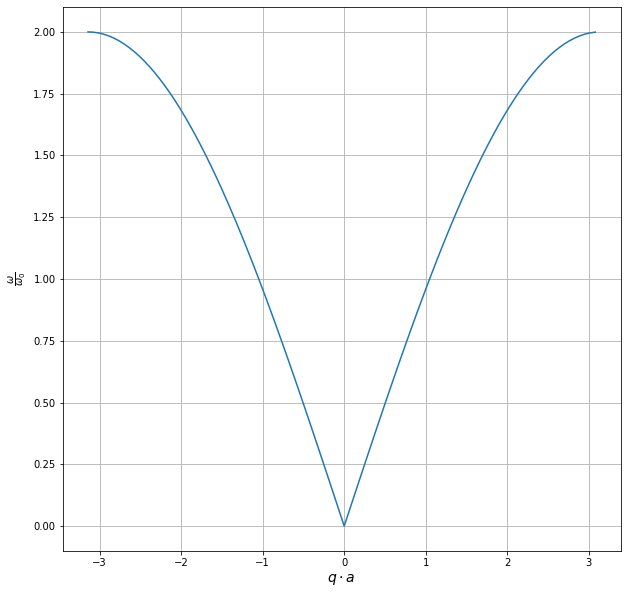

In [ ]:
def plot2():
  plt.figure(figsize=(10,10))
  plt.grid()
  N = 100
  qs = np.arange(-50, 50)*2*np.pi/N
  plt.plot(qs, 2*np.abs(np.sin(qs/2)))
  plt.xlabel(r"$q\cdot a$", fontsize=14)
  plt.ylabel(r"$\frac{\omega}{\omega_0}$", fontsize=14)
plot2()

## Schrödinger equation in finite square potential well

$$H\psi = E\psi$$

$$\frac{-\hbar^2}{2 m}\psi'' - V(x)=-|E|\psi$$

Three equations for the three regions. $\psi$ and $\psi'$ must match on the boundary. This gives a transcendent equation

In [ ]:
def plot3(E):
  plt.figure(figsize=(16, 8))
  plt.subplot(121)
  plt.xlabel('x', fontsize=14)
  xs = np.linspace(-1.0, 1.0, 200)
  V = lambda x: -1.0*(np.abs(x)<0.5)
  plt.plot(xs, V(xs))
  kap = np.sqrt(2*np.abs(E))
  k = np.sqrt(-2*(-1 - np.abs(E)))
  A = 1.0
  D = A*np.exp(-kap*0.5)/np.cos(k*0.5)
  n1, n2 = xs<-0.5, xs>0.5 
  plt.plot(xs, A*np.exp(kap*xs)*n1 + D*np.cos(k*xs)*((~n1) & (~n2)) + A*np.exp(-kap*xs)*n2)
  plt.grid()


interact(plot3, E = widgets.FloatSlider(-0.2, min=-3.5, max=-0.0, step=0.01))

interactive(children=(FloatSlider(value=-0.2, description='E', max=-0.0, min=-3.5, step=0.01), Output()), _dom…

<function __main__.plot3>

## Quantum Harmonic Oscillator

$$V(x) = \frac{1}{2}m\omega^2x^2$$

$$-\frac{\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} + \frac{1}{2}m\omega^2x^2\psi = E\psi$$

1. Dimensionless: $$\frac{\partial^2\psi}{\partial \xi^2} = (\xi^2 - k)\psi$$

2. Solve asymptotic behaviour: $\xi \to \infty$

$$\psi = h(\xi)e^{\xi^2/2}$$

3. Equation for the polinomial:

$$\frac{d^2 h}{d \xi^2} - 2 \xi \frac{dh}{d\xi} + (k-1)h = 0$$

4. Write $h$ as series: $h=\sum_{i=0}^\infty a_i\xi^i \implies$ recursion:

$$ a_{i+2} = a_i\frac{2i+1-k}{(i+1)(i+2)}$$

5. For $\psi$ to remain normalizable both the even and the odd recursion must terminate at some i: $$2n + 1 = k = \frac{2E}{\hbar \omega}$$

6. Name the the polynomials resulting from this recursion after Hermite:

$$\psi_n = H_n(\xi)e^{\xi^2/2}$$


## QHI algebraic solution

1. Ladder operators:
$$\hat{a}_\pm=\frac{1}{\sqrt{2 m}}(\hat{p}\pm im\omega\hat{x})$$

2. Their commutator:

$$[\hat{a}_-, \hat{a}_+] = \hbar \omega$$

3. Write Schrödiner-equation with them:

$$\left(\hat{a}_+\hat{a}_- + \frac{\hbar\omega}{2}\right)\psi = E\psi$$

4. They make new solutions:

$$\left(\hat{a}_+\hat{a}_- + \frac{\hbar\omega}{2}\right)\hat{a}_+\psi = \hat{a}_+\left(\hat{a}_-\hat{a}_+ + \frac{\hbar\omega}{2}\right)\psi  = \hat{a}_+\left(\hat{a}_+\hat{a}_- + \hbar\omega+ \frac{\hbar\omega}{2}\right)\psi= \hat{a}_+
(E + \hbar \omega)\psi$$

5. To avoid negative energy solutions:

$$ \hat{a}_-\psi_0 = 0 \implies \psi_0=Ce^{-x^2/2}, \ E_0=\frac{\hbar\omega}{2}$$

6. All other states:

$$\psi_n = (\hat{a}_+)^n\psi_0$$

#Rotator (rigid rotor)

A $\psi(\theta, \phi)$ wavefuction. No potential. Describes a freely rotating object

- angular momentum operator: $\hat{L_i} = \epsilon_{ijk} \hat{x}_j \hat{p}_k$

- commutes with Hamiltonian: $[\hat{L}_i, \hat{H}] = 0 $ -> common eigenstates

- magnitde op: $[\hat{L}, \hat{L^2}] =  0 = [\hat{L}, \hat{H}]$

We look for the common egienstates of $\hat{H}$, $\hat{L}$ and one chosen $\hat{L}_i$ ($\hat{L}_z$). (Or simply write the Laplacian arising from the kinetic term in Sch in spheircal coordiantes and call it a day)

1. This can be solved by sperataing the variables $\theta$ an $\phi$.

2. The $\phi$-dependent part is: $\Phi(\phi) = (2\pi)^{-1/2}e^{im\phi}$

  - The cyclic boundary condition fixes $m \in \mathbb{Z}$

3. The $\theta$-dep perts are the associaated Legendere polynomials indexed by $l\in\mathbb{N}$. $|m|\leq l$

4. $E\propto l(l+1)\hbar^2$

The solution are the spherical harmonics:

$$\hat{L}_z Y_{lm} = m\hbar Y_{lm}$$

$$\hat{L}^2 Y_{lm} = l(l+1)\hbar^2 Y_{lm}$$


In [ ]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)


def plot3(l, m):
  fcolors = sph_harm(m, l, theta, phi).real
  fmax, fmin = fcolors.max(), fcolors.min()
  fcolors = (fcolors - fmin)/(fmax - fmin)

  fig = plt.figure(figsize=plt.figaspect(1.))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))

  #ax.set_axis_off()
  plt.show()

interact(plot3, l=widgets.IntSlider(1, 0, 5), m=widgets.IntSlider(0, 0, 5))
None

interactive(children=(IntSlider(value=1, description='l', max=5), IntSlider(value=0, description='m', max=5), …